## HW #3
***
This homework primarily focuses on Descriptive Statistics and Data Visualization in Python. **Note:**

(1) This is a group assignment. You only need one group member to submit the group's solution for the group (it is recommended that each group select a group submitter for all homework to do it).

(2) <span style="color:red">Due Date: November 20th, 2024 Wednesday 7:20:59pm. Total: 50 pts.</span>

(3) <span style="color:red">Do not create any new cells on this Jupyter Notebook file. All codes should be completed in the existing cells provided.</span>

(4) <span style="color:red">Make sure to run your code for each cell so that the output/result is visible underneath each code cell. **I will run your code from top to bottom. Make sure your output matches with what would be produced by your code (every time you make changes to the code, you should run it). For each question, if your output as shown in the submitted file does not match with your code, you will automatically lose most of the points.**</span>

(5) <span style="color:red">You need to submit your completed Jupyter Notebook file (.ipynb) AND a PDF version (in Landscape layout) of your completed Jupyter Notebook  to Blackboard. **Both files must be uploaded to Blackboard in ONE submission (these are not to be submitted separately under two submissions)**. Please make sure that the PDF file shows the output of each code cell prior to submitting your files. Submissions without the valid PDF file as instructed or submissions without the valid Jupyter Notebook file as 
instructed will result in an automatic grade penality of 25%.</span> 
 
***

### Part 0: Get Ready

<span style="color:red">(1 pts)</span> **T0-1:** First, rename this Jupter Notebook file exactly as your group followed by suffix “_HW3”. For example, **the name of the Jupyter Notebook file you submit (with file extension) should be like Group1_HW3.ipynb (if you are Group 1) or Group2_HW3.ipynb (if you are Group 2), so on and so forth. Same applies to the PDF version of the file.** You will complete the tasks below on this Jyputer Notebook file, and then submit the completed the Jupyter Notebook file as well as the PDF version (in Landscape layout) of the Juputer Notebook file.

<span style="color:red">(1 pts)</span> **T0-2:** Run the cell below.

In [1]:
# Before you begin, run this cell with with the code provided below. 
# This will also help you locate the Jupyter Notebook file on your computer
import os
print(os.getcwd())

C:\Users\jasmi\Downloads\Python MSBA


### Part 1: Descriptive Statistics

In this part, you will continue to work with the mobile device usage data. An explanation of the variables (or columns) in the dataset is listed below:

| Variable/Column        | Explanation                                                     |
|:-----------------------|:----------------------------------------------------------------|
| UserID                 | Unique identifier for each user.                                |
| DeviceModel            | Model of the user's smartphone.                                 |
| OperatingSystem        | The OS of the device (iOS or Android).                          |
| AppUsageTimeMinsPerDay | Daily time spent on mobile applications, measured in minutes.   |
| NumberofAppsInstalled  | Total number of apps installed on the device.                   |
| DataUsageMBPerDay      | Daily mobile data consumption, measured in megabytes (MB).      |
| Age                    | Age of the user.                                                |
| Gender                 | Gender of the user (Male or Female).                            |

You need to download the csv file "*mobile_usage.csv*" provided on Blackboard and import it into a DataFrame first.

<span style="color:red">To ensure the csv file is imported to a DataFrame correctly, it is recommended that you copy the csv file to your current working directory (this is the output from T0-2), then you can do relative file path and just use the filename to import as we did in class.</span>

<span style="color:red">(2 pts)</span> **T1-1:** On average, how many apps does each user has on their mobile device? And on average, how much data (in MB) does each user consume per day? Use the appropriate DataFrame method(s) to **print one output** that answers both questions.

In [178]:
import pandas as pd
# T1-1 python solution code below
pd.set_option('display.expand_frame_repr', True)
mobile = pd.read_csv("mobile_usage.csv")
print(mobile[['NumberofAppsInstalled', 'DataUsageMBPerDay' ]].mean().round(2))

NumberofAppsInstalled     50.68
DataUsageMBPerDay        929.74
dtype: float64


<span style="color:red">(3 pts)</span> **T1-2:** What percentage of users are using an Android device, and What percentage of users are using an iOS device? Use the appropriate DataFrame method to **print one output that answers this question**.

In [43]:
# T1-2 python solution code below
print(mobile['OperatingSystem'].value_counts(normalize=True)*100)

OperatingSystem
Android    79.142857
iOS        20.857143
Name: proportion, dtype: float64


<span style="color:red">(3 pts)</span> **T1-3:** For iOS users, how does their age distribution look like? To answer this question, **print a succint summary of major descriptive statistics for the age of users using an iOS device** using the appropriate DataFrame method(s).

In [49]:
# T1-3 python solution code below
age_ios = mobile[mobile['OperatingSystem'] == 'iOS']
print(age_ios['Age'].describe().round(2))

count    146.00
mean      38.96
std       12.43
min       18.00
25%       29.00
50%       39.00
75%       51.00
max       59.00
Name: Age, dtype: float64


<span style="color:red">(3 pts)</span> **T1-4:** What is the average app usage time (in minutes) for users of each device model? **Print one output sorted by app usage time in the descending order and make sure there are only 2 decimal places for numbers in the output.**

In [94]:
# T1-4 python solution code below
groupedby_appusage = mobile.groupby('DeviceModel')
print(groupedby_appusage['AppUsageTimeMinsPerDay'].mean().round(2).sort_values(ascending=False))

DeviceModel
iPhone 12             282.02
OnePlus 9             270.38
Xiaomi Mi 11          268.45
Google Pixel 5        267.79
Samsung Galaxy S21    266.42
Name: AppUsageTimeMinsPerDay, dtype: float64


<span style="color:red">(5 pts)</span> **T1-5:** Now you are specifically focused on users who are using a Google Pixel 5 or a Samsung Galaxy S21, and you are interested in the summary statistics of # of apps installed, app usage time in minutes per day, and data usage per day for them. **Print one output for the requested summary statistics and make sure there are only 2 decimal places for numbers in the output.**

In [180]:
# T1-5 python solution code below
# Filter data for Google Pixel 5 and Samsung Galaxy S21 users
filtered_mobile = mobile[mobile['DeviceModel'].isin(['Google Pixel 5', 'Samsung Galaxy S21'])]

# Group by device and calculate summary statistics
print(filtered_mobile.groupby('DeviceModel')[['NumberofAppsInstalled','AppUsageTimeMinsPerDay','DataUsageMBPerDay']].describe().round(2))

                   NumberofAppsInstalled                                   \
                                   count   mean    std   min    25%   50%   
DeviceModel                                                                 
Google Pixel 5                     142.0  49.91  27.10  10.0  26.75  48.0   
Samsung Galaxy S21                 133.0  50.80  26.92  10.0  25.00  51.0   

                                AppUsageTimeMinsPerDay          ...         \
                      75%   max                  count    mean  ...    75%   
DeviceModel                                                     ...          
Google Pixel 5      69.75  99.0                  142.0  267.79  ...  443.5   
Samsung Galaxy S21  75.00  99.0                  133.0  266.42  ...  414.0   

                          DataUsageMBPerDay                                \
                      max             count    mean     std    min    25%   
DeviceModel                                                          

<span style="color:red">(4 pts)</span> **T1-6:** Now you are interested in comparing iOS users to Android users to find out which group is more attached to the device. To examine this, you will answer: for each mobile operating system, what is the average app usage time (in minutes) per day? and what is the average data usage (in MB) per day? Use appropriate DataFrame method(s) to **print one output** that answers both questions.

In [193]:
# T1-6 python solution code below

groupedby_os = mobile.groupby('OperatingSystem')
print(groupedby_os[['AppUsageTimeMinsPerDay', 'DataUsageMBPerDay']].describe().round(2))


                AppUsageTimeMinsPerDay                                       \
                                 count    mean     std   min     25%    50%   
OperatingSystem                                                               
Android                          554.0  268.26  179.19  30.0  104.25  225.0   
iOS                              146.0  282.02  169.59  32.0  142.25  257.5   

                               DataUsageMBPerDay                         \
                    75%    max             count    mean     std    min   
OperatingSystem                                                           
Android          436.75  598.0             554.0  920.32  644.75  102.0   
iOS              431.75  597.0             146.0  965.51  624.75  111.0   

                                                
                   25%    50%      75%     max  
OperatingSystem                                 
Android          366.5  818.5  1340.00  2497.0  
iOS              424.5  907.0  1

### Part 2: Data Visualization - 1

In this part, you will continue to work with the mobile device usage data that you have already imported into a DataFrame.

<span style="color:red">(5 pts)</span> **T2-1:** You are interested in comparing male users to female users. How does the app usage time (in minutes) for male users compare to that of female users? Use an appropriate visualization to present a graph/plot to the screen to help answer this question. **Make sure the graph/plot has at least a meaningful title, and meaningful descriptions of the horizontal axis and the vertial axis.**

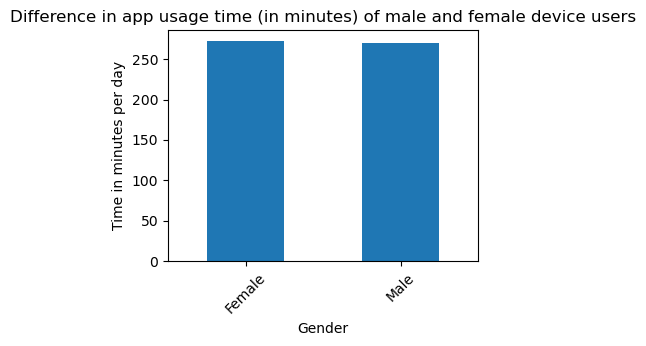

In [242]:
import matplotlib.pyplot as plt # need it to present the graphs to the screen
# T2-1 python solution code below
gender_usage = mobile.groupby('Gender')['AppUsageTimeMinsPerDay'].mean().round(2)
gender_usage.plot.bar(x='Gender',
                y='AppUsageTimeMinsPerDay',
                title='Difference in app usage time (in minutes) of male and female device users',
                ylabel='Time in minutes per day',
                xlabel='Gender',
                figsize=(4,3),
                rot=45)
plt.show()

<span style="color:red">(4 pts)</span> **T2-2:** Is there a positive or negative or no obvious relationship between # of apps installed and app usage time per day? Use an appropriate visualization to present a graph/plot to the screen to help answer this question. **Make sure the graph/plot has at least a meaningful title, and meaningful descriptions of the horizontal axis and the vertial axis. Then based on the graph, use *print()* to print a statement for your answer to the question.**

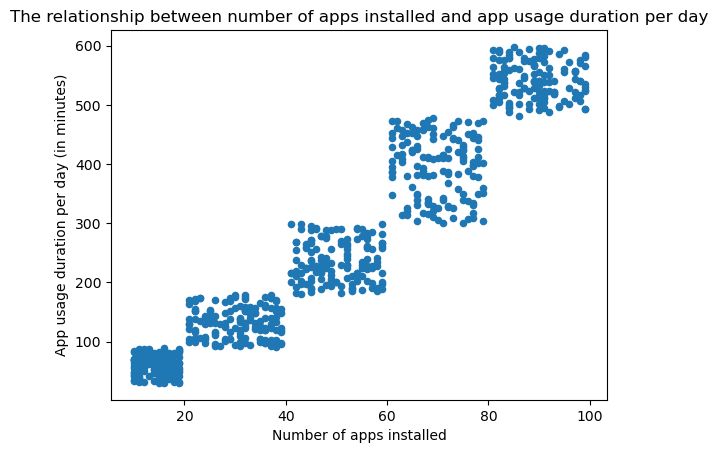

There is a postive relationship of the more apps you have the more minutes perday you spend on apps.


In [250]:
# T2-2 python solution code below
mobile.plot.scatter(x='NumberofAppsInstalled',
                    y='AppUsageTimeMinsPerDay',
                    title='The relationship between number of apps installed and app usage duration per day',
                   xlabel= 'Number of apps installed',
                   ylabel= 'App usage duration per day (in minutes)')
plt.show()
# Once you have run the visualization code to see the graph,
# print your answer/conclusion below, and then run the entire cell again.
print('There is a postive relationship of the more apps you have the more minutes perday you spend on apps.')

### Part 3: Data Visualization - 2

In this part, you will work with a yearly sales dataset of BEV (battery electric vehicle) for 10 countries in the recent 5 years (i.e., from 2019 to 2023). You need to download the csv file "*BEV.csv*" provided on Blackboard and import it into a DataFrame first. An explanation of the variables (or columns) in the dataset is listed below:

| Variable/Column        | Explanation                               |
|:-----------------------|:------------------------------------------|
| country                | country name                              |
| year                   | year                                      |
| BEV_sales              | # of BEV sold (in thousands) in that year |

<span style="color:red">(2 pts)</span> **T3-1:**  Import the csv file "*EV.csv*"into a DataFrame, print the first 7 rows, then print the last 7 rows. This is to help make sure the data has been imported correctly.

In [256]:
# T3-1 python solution code below
import pandas as pd
bev= pd.read_csv("BEV.csv")
print(bev.head(n=7))
print()
print(bev.tail(n=7))

   country  year  BEV_sales
0  Belgium  2019        8.8
1  Belgium  2020       15.0
2  Belgium  2021       23.0
3  Belgium  2022       38.0
4  Belgium  2023       93.0
5   Canada  2019       32.0
6   Canada  2020       37.0

           country  year  BEV_sales
43  United Kingdom  2022      270.0
44  United Kingdom  2023      310.0
45             USA  2019      240.0
46             USA  2020      230.0
47             USA  2021      470.0
48             USA  2022      800.0
49             USA  2023     1100.0


<span style="color:red">(3 pts)</span> **T3-2:** How does the average yearly BEV sales for one country compare to other countries? Use an appropriate visualization to present a graph/plot to the screen to help answer this question. **Make sure that the graph/plot has a meaningful title and meaningful descriptions of the horizontal axis and the vertial axis.

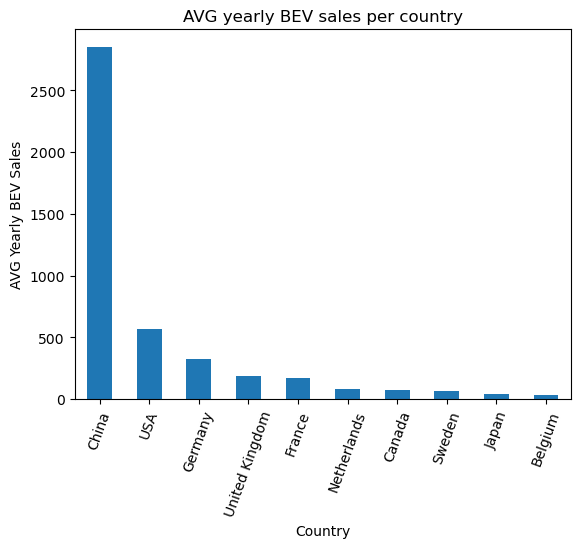

In [315]:
# T3-2 python solution code below
yearly_bev_sales = bev.groupby('country')['BEV_sales'].mean().round(2).sort_values(ascending=False)
yearly_bev_sales.plot.bar(x='country', 
                          y= 'BEV_sales',
                         title='AVG yearly BEV sales per country',
                         xlabel='Country',
                         ylabel='AVG Yearly BEV Sales',
                         rot=(70))
plt.show()

<span style="color:red">(5 pts)</span> **T3-3:** In the class, we have learned using **.mean()** method to calcualte the average/mean of values. Similarly, you can use the **.sum()** method of DataFrame to do a sum of values. How does the total BEV sales for one EU (European Union) country compare to other EU countries? European countries in the provided data include: Belgium, France, Germany, Netherlands, and Sweden. Use appropriate DataFrame method(s) and an appropriate visualization to answer this question. **Make sure the graph/plot has at least a meaningful title, and meaningful descriptions of the horizontal axis and the vertial axis.**

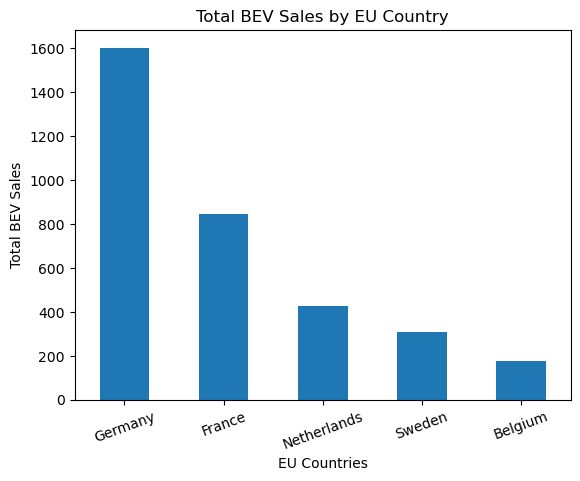

In [432]:
# T3-3 python solution code below
#make the EU group pf countries
eu_subset = ['Belgium', 'France', 'Germany', 'Netherlands','Sweden']
eu_data = bev[bev['country'].isin(eu_subset)] 

#total BEV sales for one eu union compare to other eu countries
total_BEV_sales= eu_data.groupby('country')['BEV_sales'].sum().round(2).sort_values(ascending=False)
total_BEV_sales.plot.bar(x='Country',
                        y='Bev_sales',
                        title='Total BEV Sales by EU Country',
                        xlabel='EU Countries',
                        ylabel= 'Total BEV Sales',
                        rot=(20))
plt.show()

<span style="color:red">(4 pts)</span> **T3-4:** What are the top 3 countries that have sold the most number of BEVs, and how do their total BEV sales compare to each other? Present the results **both numerically and visually**. Use appropriate DataFrame method(s) and an appropriate visualization to present the answers. **Make sure the graph/plot has at least a meaningful title, and meaningful descriptions of the horizontal axis and the vertial axis.**

For this task, you are also going to learn and use the *.nlargest()* method of DataFrame to find the rows with the largest values. First, read the code & comments below, and run the code to learn and understand the *.nlargest()* method.

In [345]:
# An example of .nlargest() method
# Read the code, and run the code in this cell to learn the method.
import pandas as pd
# df_a is a dataframe containing students and their scores.
df_a = pd.DataFrame(
    {
        "Student": ["Taylor", "Mike", "John", "Sarah" , "Julie"],
        'Score': [90, 95, 86, 97, 78]
    }
)
print(df_a, "\n")
# .nlargest() on a DataFrame
# print the rows with the two largest values in the Score column in desending order
print(df_a.nlargest(2, 'Score')) 
# the above should print the row for Sarah with a score 97, and then the row for Mike with a score of 95
print()

# .nlargest() can also be used on a Series, which has only one column of data
score = df_a['Score'] # select a single column from the DataFrame, it returns a Series
# .nlargest() on a Series
print(score.nlargest(2)) # because there is only one column in a Series, you do not need to specify column name
# the above should print row 3 with score 97 and row 1 with score 95

  Student  Score
0  Taylor     90
1    Mike     95
2    John     86
3   Sarah     97
4   Julie     78 

  Student  Score
3   Sarah     97
1    Mike     95

3    97
1    95
Name: Score, dtype: int64


Now write your Python code to complete the task T3-4. Again, **make sure the graph/plot has at least a meaningful title, and meaningful descriptions of the horizontal axis and the vertial axis.**

country
China      14250.0
USA         2840.0
Germany     1603.0
Name: BEV_sales, dtype: float64



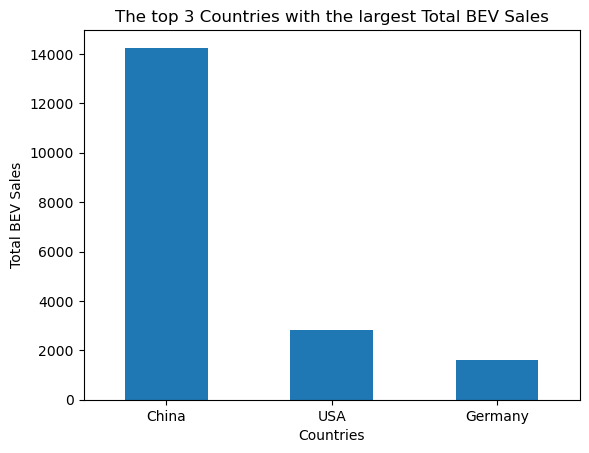

In [412]:
# T3-4 python solution code below
# What are the top 3 countries that have sold the most number of BEVs, and how do their total BEV sales compare to each other? bev
bev= pd.read_csv("BEV.csv")
total_bev = bev.groupby('country')['BEV_sales'].sum().round(2)

top_3 = total_bev.nlargest(3)
print(top_3)
print()

top_3.nlargest(3).plot.bar(x='country',
                          y= 'BEV_sales',
                          title='The top 3 Countries with the largest Total BEV Sales',
                          xlabel='Countries',
                          ylabel= 'Total BEV Sales',
                          rot=(0))
plt.show()

<span style="color:red">(5 pts)</span> **T3-5:** What is the yearly trend of total sold BEVs in the data? Namely, how does the total sales of BEVs (across all countries in the data) change from year to year? Use an appropriate visualization to present a graph/plot to the screen to help answer this question. **Make sure: (1) the graph/plot has a meaningful title, and meaningful descriptions of the horizontal axis and the vertial axis; (2) the ticks in the x-axis corresponds exactly to the years.**

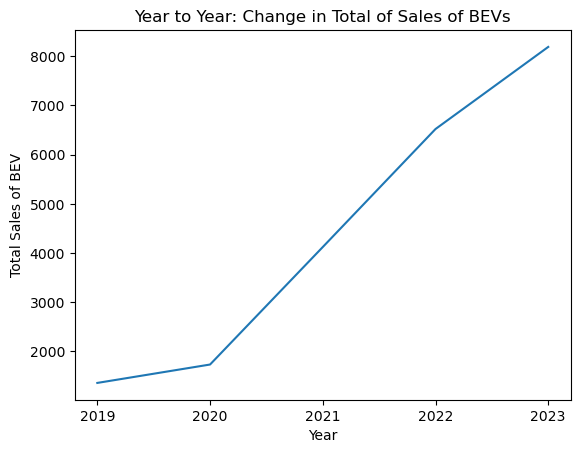

In [430]:
# T3-5 python solution code below
total_bev = bev.groupby('year')['BEV_sales'].sum().round(2)

line_chart = total_bev.plot.line(x='year', y='BEV_sales',
                                title='Year to Year: Change in Total of Sales of BEVs',
                                xlabel='Year',
                                ylabel='Total Sales of BEV')
line_chart.set_xticks(total_bev.index)
plt.show()

## End of Homework
<span style="color:red">Once you have completed it and run all the cells, please remember to **print the Jupyter Notebook file as a PDF file (Landscape layout)** and submit it along with your Jupyter Notebook file, as both are required.</span>